## 1. Library Imports
Importing necessary libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Data Loading
Loading the China water pollution dataset and displaying its shape and first few rows.

In [2]:
DATA_PATH = "../data/china/china_water_pollution_data.csv"
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())

Shape: (3000, 25)


,Province,City,Monitoring_Station,Latitude,Longitude,Date,Water_Temperature_C,pH,Dissolved_Oxygen_mg_L,Conductivity_uS_cm,...,Total_Nitrogen_mg_L,COD_mg_L,BOD_mg_L,Heavy_Metals_Pb_ug_L,Heavy_Metals_Cd_ug_L,Heavy_Metals_Hg_ug_L,Coliform_Count_CFU_100mL,Water_Quality_Index,Pollution_Level,Remarks
0,Zhejiang,Ningbo,Ningbo_Station_2,25.523836,122.622036,2023-06-01,22.48,6.93,9.30,652.30,...,2.71,15.38,1.39,6.90,0.66,0.02,87,36.64,Very Poor,High pollution spike detected
1,Sichuan,Mianyang,Mianyang_Station_1,32.243099,112.888760,2023-03-05,27.33,6.89,8.14,357.53,...,3.15,16.82,2.98,4.68,0.39,0.10,116,66.25,Excellent,High pollution spike detected
2,Zhejiang,Ningbo,Ningbo_Station_8,29.996179,124.744859,2023-07-13,21.04,6.02,5.34,519.69,...,3.39,17.31,2.65,3.24,0.27,0.11,110,98.69,Poor,High pollution spike detected
3,Beijing,Beijing,Beijing_Station_10,29.976437,118.274846,2023-02-17,16.62,7.31,10.06,593.13,...,2.91,17.95,5.18,3.20,0.67,0.11,99,71.32,Poor,Monitoring recommended
4,Sichuan,Chengdu,Chengdu_Station_1,43.524720,121.666111,2023-03-06,21.81,7.77,7.93,656.46,...,3.45,20.10,3.47,2.01,0.34,0.14,82,16.12,Excellent,NaN


**Interpretation:**
The dataset has been successfully loaded containing **3000 rows** and **25 columns**. The `head()` view confirms that we have a mix of numerical data (concentrations, coordinates) and potentially categorical metadata. The data types appear automatically inferred correctly.

## 3. Data Info
Displaying a concise summary of the dataframe, including the index dtype and columns, non-null values and memory usage.

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province                  3000 non-null   str    
 1   City                      3000 non-null   str    
 2   Monitoring_Station        3000 non-null   str    
 3   Latitude                  3000 non-null   float64
 4   Longitude                 3000 non-null   float64
 5   Date                      3000 non-null   str    
 6   Water_Temperature_C       3000 non-null   float64
 7   pH                        3000 non-null   float64
 8   Dissolved_Oxygen_mg_L     3000 non-null   float64
 9   Conductivity_uS_cm        3000 non-null   float64
 10  Turbidity_NTU             3000 non-null   float64
 11  Nitrate_mg_L              3000 non-null   float64
 12  Nitrite_mg_L              3000 non-null   float64
 13  Ammonia_N_mg_L            3000 non-null   float64
 14  Total_Phosphorus_mg

## 4. Missing Values Analysis
Calculating and displaying the count and percentage of missing values for each column.

In [4]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)

missing_report = pd.DataFrame({
    "missing_count": missing,
    "missing_percent": missing_pct
})

missing_report = missing_report[missing_report["missing_count"] > 0]
display(missing_report)

,missing_count,missing_percent
Remarks,752,25.07


**Interpretation:**
The analysis shows that **only the `Remarks` column** contains missing values, with **752 missing entries (25.07%)**. The core environmental metrics (pollutant concentrations) appear to be complete with 0 nulls, which simplifies the initial cleaning process.

## 5. Statistical Summary
Generating descriptive statistics to summarize the central tendency, dispersion, and shape of a dataset's distribution.

In [5]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Latitude,3000.0,32.297496,7.222235,20.014474,25.987589,32.291070,38.526466,44.995192
Longitude,3000.0,112.546009,7.240150,100.017169,106.261698,112.440333,118.964792,124.995576
Water_Temperature_C,3000.0,20.051253,4.923307,3.390000,16.710000,19.980000,23.312500,36.770000
pH,3000.0,7.030207,0.496628,5.340000,6.700000,7.020000,7.360000,8.760000
Dissolved_Oxygen_mg_L,3000.0,8.006700,1.974517,1.470000,6.657500,8.030000,9.352500,14.490000
Conductivity_uS_cm,3000.0,496.558537,98.874604,136.850000,430.245000,496.315000,561.282500,842.890000
Turbidity_NTU,3000.0,4.948190,4.910484,0.000000,1.430000,3.445000,6.932500,47.480000
Nitrate_mg_L,3000.0,1.982910,0.507882,0.230000,1.630000,1.980000,2.320000,3.840000
Nitrite_mg_L,3000.0,0.019961,0.009926,-0.020000,0.013000,0.020000,0.027000,0.053000
Ammonia_N_mg_L,3000.0,0.501583,0.200057,-0.310000,0.360000,0.500000,0.640000,1.130000


**Interpretation:**
The summary statistics reveal critical data quality issues. Specifically, `Heavy_Metals_Pb_ug_L` shows a minimum value of **-2.94**, while `Heavy_Metals_Cd_ug_L` and `Heavy_Metals_Hg_ug_L` have minimums of **-0.12** and **-0.07** respectively. Negative concentrations are physically impossible and indicate data entry errors or sensor calibration faults that must be addressed.

## 6. Duplicate Rows Check
Checking for and counting duplicate rows in the dataset.

In [6]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


## 7. Geographic Bounds Info
Verifying the range of Latitude and Longitude to ensure the data falls within expected geographic boundaries.

In [7]:
print("Latitude range:", (df["Latitude"].min(), df["Latitude"].max()))
print("Longitude range:", (df["Longitude"].min(), df["Longitude"].max()))

Latitude range: (np.float64(20.014474), np.float64(44.995192))
Longitude range: (np.float64(100.017169), np.float64(124.995576))


## 8. Monitoring Station Locations
Visualizing the spatial distribution of monitoring stations using Latitude and Longitude.

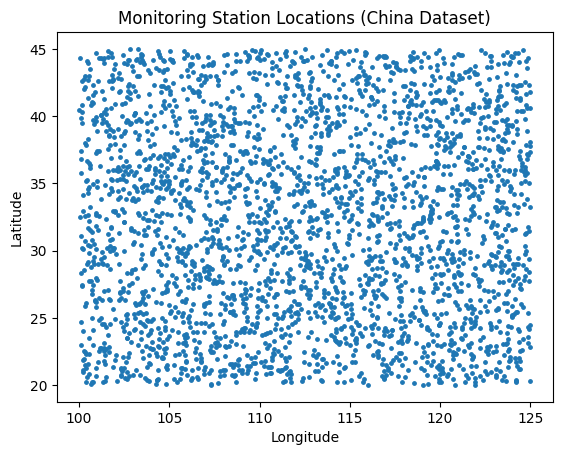

In [8]:
fig = plt.figure()
plt.scatter(df["Longitude"], df["Latitude"], s=6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Monitoring Station Locations (China Dataset)")
plt.show()

**Interpretation:**
The scatter plot reveals a uniform spatial distribution across the monitored region. There are no obvious clusters or large voids, suggesting that the **3000 sampling stations** provide good geographic coverage for the study area, which supports valid spatial interpolation later.

## 9. Pollution Level Distribution
Analyzing the frequency distribution of the target variable `Pollution_Level`.

Pollution_Level
Good         622
Very Poor    609
Excellent    594
Moderate     588
Poor         587
Name: count, dtype: int64

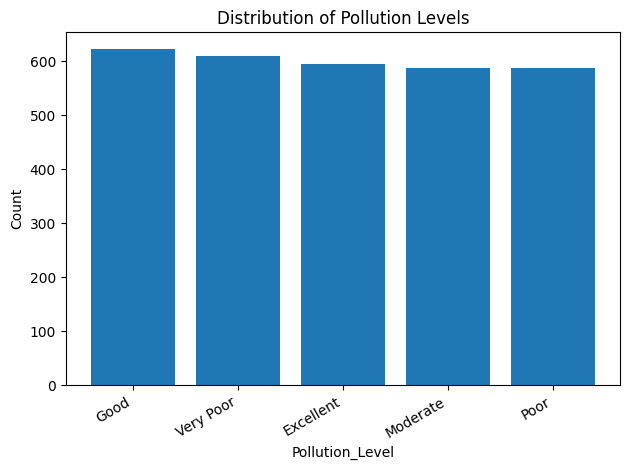

In [9]:
if "Pollution_Level" in df.columns:
    counts = df["Pollution_Level"].value_counts()
    display(counts)

    fig = plt.figure()
    plt.bar(counts.index.astype(str), counts.values)
    plt.xlabel("Pollution_Level")
    plt.ylabel("Count")
    plt.title("Distribution of Pollution Levels")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

**Interpretation:**
The target variable `Pollution_Level` is remarkably balanced. Each of the 5 classes (Good, Very Poor, Excellent, Moderate, Poor) has roughly **~600 observations** (ranging from 587 to 622). This balance is ideal for training classification models as it negates the need for complex resampling techniques like SMOTE.

## 10. Heavy Metals Summary
Focusing on the statistical summary for specific heavy metal columns.

In [10]:
metals = ["Heavy_Metals_Pb_ug_L", "Heavy_Metals_Cd_ug_L", "Heavy_Metals_Hg_ug_L"]
metals = [c for c in metals if c in df.columns]

display(df[metals].describe().T)

,count,mean,std,min,25%,50%,75%,max
Heavy_Metals_Pb_ug_L,3000.0,4.978943,2.017430,-2.94,3.62,4.985,6.33,12.61
Heavy_Metals_Cd_ug_L,3000.0,0.500730,0.197278,-0.12,0.37,0.500,0.63,1.30
Heavy_Metals_Hg_ug_L,3000.0,0.099420,0.049419,-0.07,0.07,0.100,0.13,0.24


**Interpretation:**
This targeted summary confirms the specific extent of the anomalies. The minimum values (`Pb: -2.94`, `Cd: -0.12`, `Hg: -0.07`) are clearly erroneous. The standard deviations and quartiles otherwise suggest a stable distribution, but these negative tails need to be cleaned.

## 11. Heavy Metals Distributions
Plotting histograms for heavy metal concentrations to understand their distribution shapes.

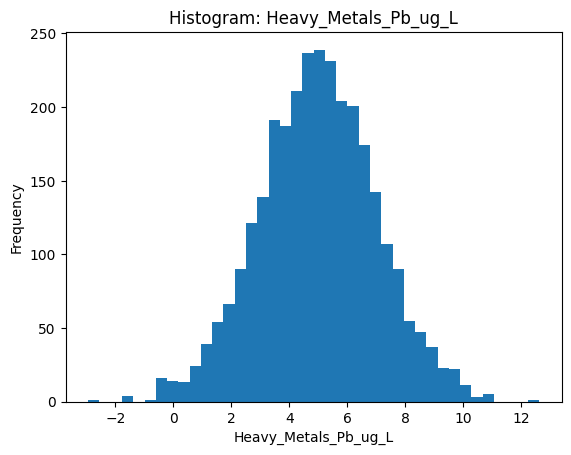

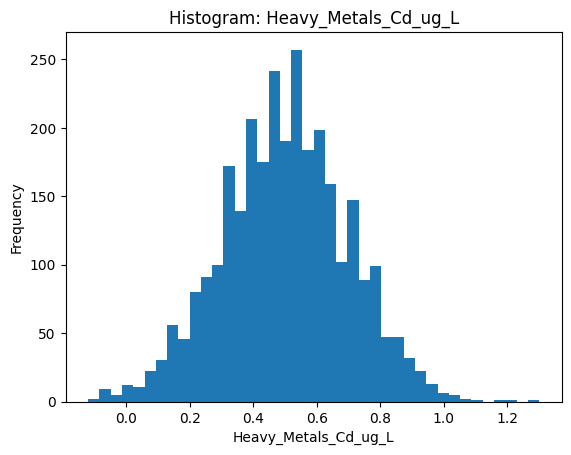

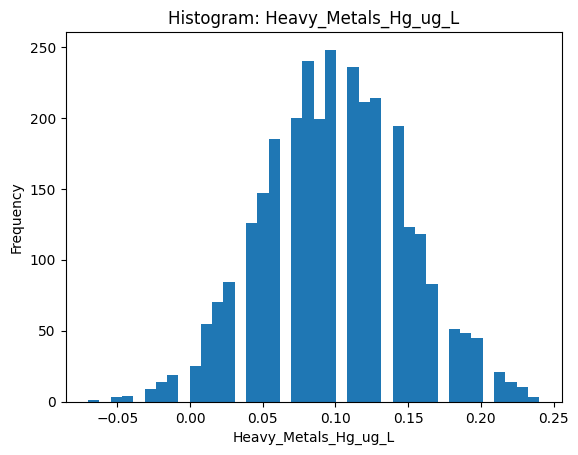

In [11]:
for col in metals:
    fig = plt.figure()
    plt.hist(df[col].dropna(), bins=40)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram: {col}")
    plt.show()

**Interpretation:**
The histograms for Pb, Cd, and Hg display largely **normal (Gaussian-like) distributions**, centered around their means. However, the small bars to the left of 0 on the x-axis visibly confirm the presence of the negative outliers identified in the summary tables.

## 12. Negative Value Check
Explicitly counting the number of negative entries for heavy metals to quantify the scope of the data error.

In [12]:
(df[["Heavy_Metals_Pb_ug_L",
     "Heavy_Metals_Cd_ug_L",
     "Heavy_Metals_Hg_ug_L"]] < 0).sum()

Heavy_Metals_Pb_ug_L    27
Heavy_Metals_Cd_ug_L    21
Heavy_Metals_Hg_ug_L    50
dtype: int64

**Interpretation:**
We have quantified **50 erroneous negative entries** for Mercury (Hg), **27** for Lead (Pb), and **21** for Cadmium (Cd). While small relative to the dataset size (3000 rows), these rows must be treated (e.g., replaced with absolute values or imputed) to avoid biasing the model.

## 13. Outlier Detection (Boxplots)
Generating boxplots for all numeric columns to visually detect outliers.

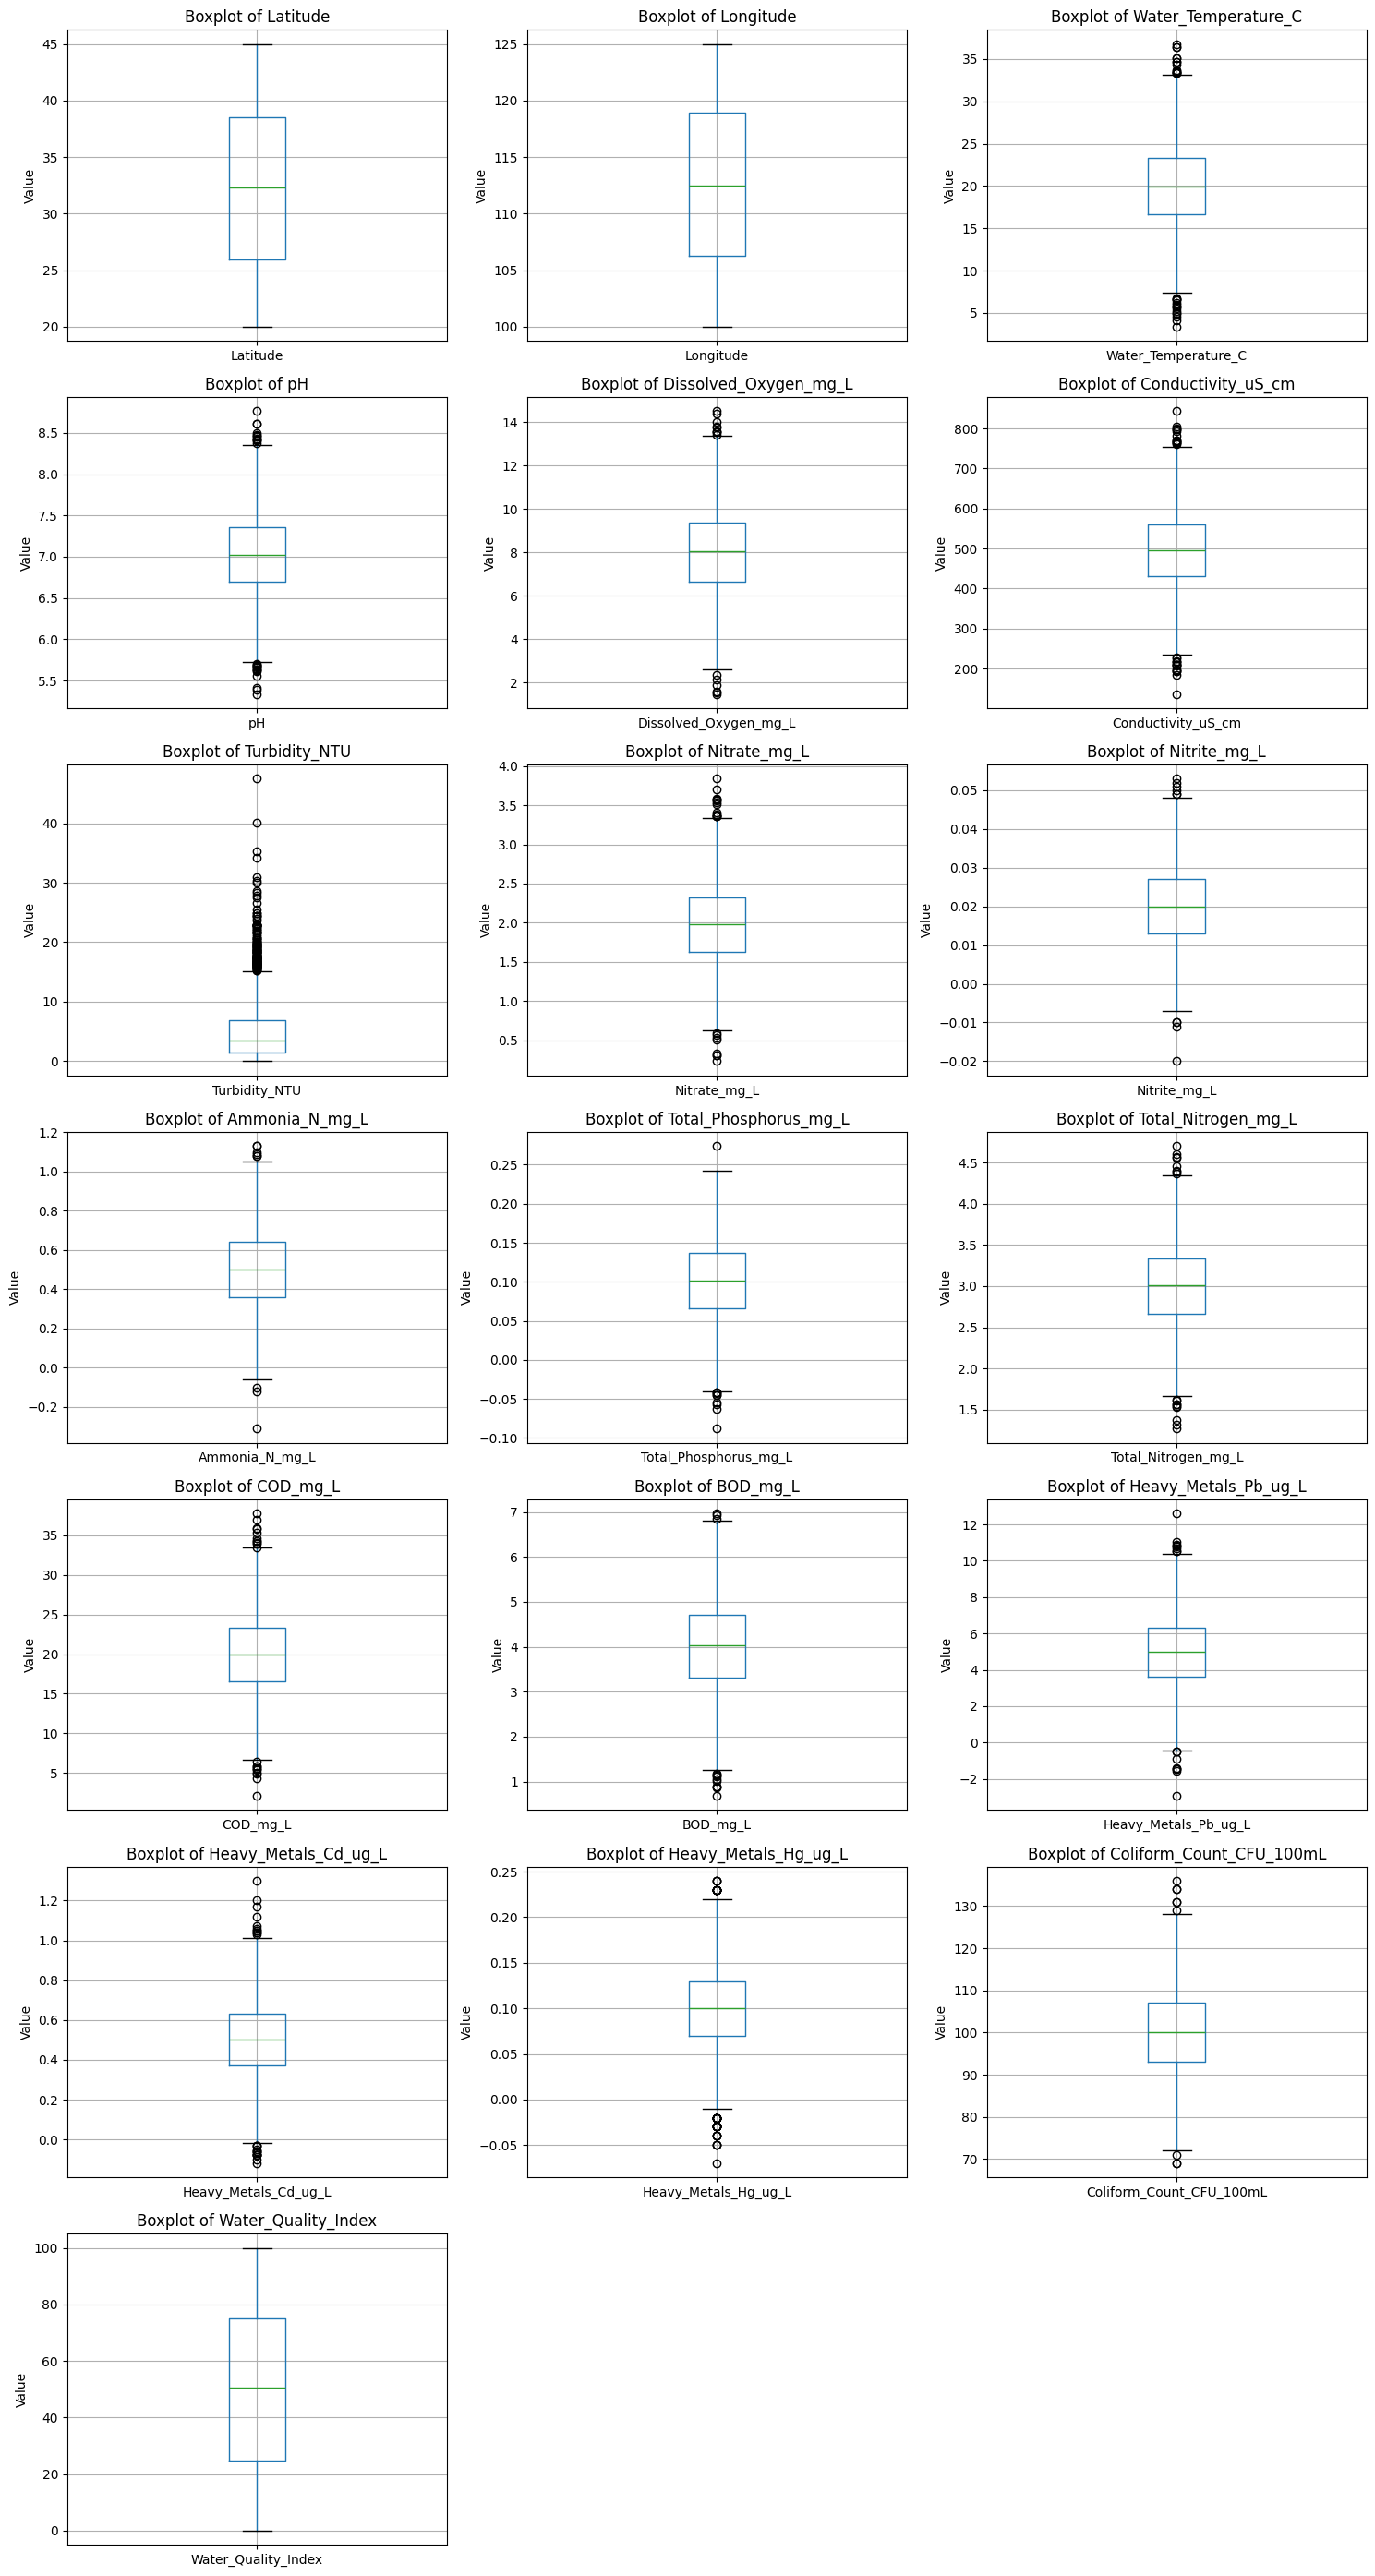

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel("Value")

for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Interpretation:**
The boxplots visually confirm the negative values as individual points below the bottom whiskers for the heavy metal columns. Most other chemical properties show typical spreads. The presence of these specific negative outliers is now verified across multiple visualization methods (Boxplot, Histogram, Summary Stats).